In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data 
df = pd.read_csv("portfolio_metrics_historical_data.csv")
df.head()

,Unnamed: 0,.\Historical_Prices_Csv\usdollar_investing.csv,.\Historical_Prices_Csv\spdr-gold-trust_investing.csv,.\Historical_Prices_Csv\ishares-global-corporate-bond-$_investing.csv,.\Historical_Prices_Csv\db-x-trackers-ii-global-sovereign-5_investing.csv,.\Historical_Prices_Csv\amundi-msci-wrld-ae-c_investing.csv,RETURN,VOLAT
0,0,1.0,0.0,0.0,0.0,0.0,-6.691566,3.273306
1,1,0.8,0.2,0.0,0.0,0.0,1.626032,1.550114
2,2,0.6,0.4,0.0,0.0,0.0,8.572617,3.200567
3,3,0.4,0.6,0.0,0.0,0.0,14.461361,5.037489
4,4,0.2,0.8,0.0,0.0,0.0,19.516803,6.598223


# Correlation coefficient 

In [3]:
corr_coeff = df['RETURN'].corr(df['VOLAT'])

In [4]:
corr_coeff

0.7021282549464515

# Risk-return scatter plot

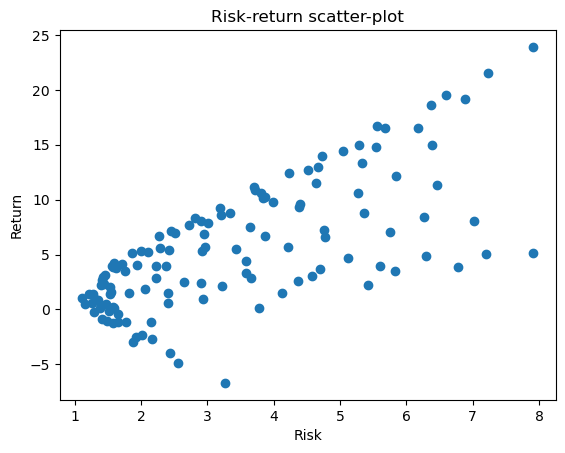

In [5]:
plt.scatter(df['VOLAT'], df['RETURN'])

# Ajouter un titre et des étiquettes d'axes
plt.title('Risk-return scatter-plot')
plt.xlabel('Risk')
plt.ylabel('Return')

# Afficher le graphique de dispersion
plt.show()

# Linear Regression

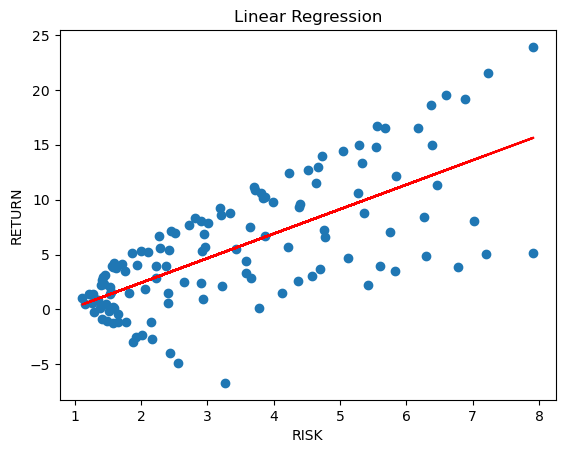

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['VOLAT']], df['RETURN'])
return_pred = reg.predict(df[['VOLAT']])

plt.title('Linear Regression')
plt.scatter(df['VOLAT'], df['RETURN'])
plt.plot(df['VOLAT'], return_pred, color='red')

plt.xlabel('RISK')
plt.ylabel('RETURN')

plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

# Obtenir le coefficient de détermination (R²)
r_squared = reg.score(df[['VOLAT']], df['RETURN'])

# Obtenir l'erreur quadratique moyenne (EQM)
y_pred = reg.predict(df[['VOLAT']])
mse = mean_squared_error(df['RETURN'], return_pred)

# Afficher le coefficient de détermination (R²) et l'erreur quadratique moyenne (EQM)
print('Determination Coefficient (R²) :', r_squared)
print('Mean square error (MSE) :', mse)

Determination Coefficient (R²) : 0.4929840863941489
Mean square error (MSE) : 16.654725090108503


# Group portefolios by risk

In [8]:
df['risk_group'] = pd.qcut(df['VOLAT'], q=3, labels=['low', 'medium', 'high'])

In [14]:
df.head()

,Unnamed: 0,.\Historical_Prices_Csv\usdollar_investing.csv,.\Historical_Prices_Csv\spdr-gold-trust_investing.csv,.\Historical_Prices_Csv\ishares-global-corporate-bond-$_investing.csv,.\Historical_Prices_Csv\db-x-trackers-ii-global-sovereign-5_investing.csv,.\Historical_Prices_Csv\amundi-msci-wrld-ae-c_investing.csv,RETURN,VOLAT,risk_group
0,0,1.0,0.0,0.0,0.0,0.0,-6.691566,3.273306,medium
1,1,0.8,0.2,0.0,0.0,0.0,1.626032,1.550114,low
2,2,0.6,0.4,0.0,0.0,0.0,8.572617,3.200567,medium
3,3,0.4,0.6,0.0,0.0,0.0,14.461361,5.037489,high
4,4,0.2,0.8,0.0,0.0,0.0,19.516803,6.598223,high


In [10]:
low_return = df[df['risk_group'] == 'low']['RETURN'].mean()
medium_return = df[df['risk_group'] == 'medium']['RETURN'].mean()
high_return = df[df['risk_group'] == 'high']['RETURN'].mean()

In [12]:
print(low_return)
print(medium_return)
print(high_return)

1.3952188237856509
4.824720048838195
10.414991776558974


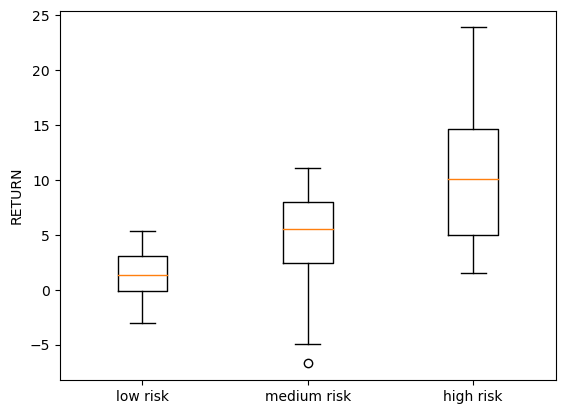

In [13]:
fig, ax = plt.subplots()
ax.boxplot([df[df['risk_group']=='low']['RETURN'], df[df['risk_group']=='medium']['RETURN'], df[df['risk_group']=='high']['RETURN']])
ax.set_xticklabels(['low risk', 'medium risk', 'high risk'])
ax.set_ylabel('RETURN')
plt.show()